In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [2]:
from keras.models import load_model

model = load_model('/home/furkan/Desktop/Models/modelV3.h5')
model.summary()  # As a reminder.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
___________________

In [125]:
import os

path = '/home/furkan/Desktop/Models/letters5/'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        files.append(os.path.join(r, file))

for f in files:
    print(f)

/home/furkan/Desktop/Models/letters5/l-211.jpg
/home/furkan/Desktop/Models/letters5/l-130.jpg
/home/furkan/Desktop/Models/letters5/l-151.jpg
/home/furkan/Desktop/Models/letters5/l-9.jpg
/home/furkan/Desktop/Models/letters5/l-217.jpg
/home/furkan/Desktop/Models/letters5/l-234.jpg
/home/furkan/Desktop/Models/letters5/l-148.jpg
/home/furkan/Desktop/Models/letters5/l-158.jpg
/home/furkan/Desktop/Models/letters5/l-125.jpg
/home/furkan/Desktop/Models/letters5/l-145.jpg
/home/furkan/Desktop/Models/letters5/l-25.jpg
/home/furkan/Desktop/Models/letters5/l-218.jpg
/home/furkan/Desktop/Models/letters5/l-116.jpg
/home/furkan/Desktop/Models/letters5/l-239.jpg
/home/furkan/Desktop/Models/letters5/l-112.jpg
/home/furkan/Desktop/Models/letters5/l-186.jpg
/home/furkan/Desktop/Models/letters5/l-194.jpg
/home/furkan/Desktop/Models/letters5/l-225.jpg
/home/furkan/Desktop/Models/letters5/l-215.jpg
/home/furkan/Desktop/Models/letters5/l-137.jpg
/home/furkan/Desktop/Models/letters5/l-7.jpg
/home/furkan/Deskt

In [126]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
from keras.applications import VGG16
import os, shutil
import cv2

#dir3 = os.listdir('/home/furkan/Desktop/pngs/')
img_path = []

for f in files: 
    img = image.load_img(f, target_size=(150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    img_path.append(img)


# The local path to our target image
#img_path = '/home/furkan/Desktop/l-83.jpg'

# `img` is a PIL image of size 150x150
#img = image.load_img(img_path, target_size=(150, 150))

# `x` is a float32 Numpy array of shape (150, 150, 3)
#x = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 150, 150, 3)
#x = np.expand_dims(x, axis=0)
#x /= 255

# Finally we preprocess the batch
# (this does channel-wise color normalization)
#x = preprocess_input(x)

In [119]:
img_path[0]

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


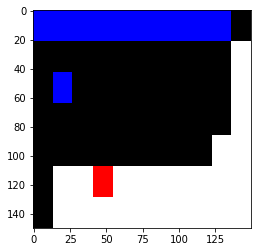

In [127]:
import matplotlib.pyplot as plt

plt.imshow(img_path[0][0])
plt.show()

In [148]:
len(img_path)
    

239

In [128]:
preds = model.predict_classes(img_path[3])
print('Predicted:', preds)

Predicted: [15]


In [149]:
tahminler = []

for pred in img_path:
    tahmin = model.predict_classes(pred)
    tahminler.append(tahmin)

In [151]:
tahminler[0]

array([9])

In [135]:
letterDictionary = { 1:"a", 2:"b", 3:"ç", 4:"c", 5:"da",
                    6:"de", 7:"e", 8:"f", 9:"ğa", 10:"ha",
                   11:"hamze", 12:"he", 13:"hi", 14:"j", 15:"ka",
                   16:"ka", 17:"ke", 18:"l", 19:"lamelif", 20:"m",
                   21:"nef", 22:"n", 23:"p", 24:"r", 25:"sad", 
                    26:"se", 27:"ş", 28:"s", 29:"te", 30:"ti",
                   31:"v", 32:"y", 33:"z",34:"zel",35:"zi"}

In [154]:
for key,value in letterDictionary.items():
    if preds == key:
        print(value)

ka


In [155]:
result = []

In [156]:
for tahmin in tahminler:
    for key, value in letterDictionary.items():
        if tahmin == key:
            result.append(value)
    

In [159]:
len(result)

239

In [162]:
for i in range(len(result)):
    print(result[i])

ğa
y
y
ka
y
ğa
ka
ğa
ka
ka
y
y
ğa
ğa
y
y
ka
y
y
ğa
ğa
l
ğa
hi
ğa
y
y
y
v
ğa
ka
ğa
ğa
ka
ğa
ka
ka
y
y
ka
ka
ka
y
ğa
ğa
ğa
ka
ka
y
ka
ka
e
y
ka
ğa
ka
y
ka
y
y
ka
ğa
ka
y
ğa
ğa
ğa
y
ka
ka
ğa
ka
te
ka
c
ka
y
ka
y
y
y
v
y
y
y
y
ğa
ğa
ka
ğa
ka
m
ka
hi
ğa
ka
y
y
y
y
ka
ka
hi
y
ğa
ka
ğa
e
ğa
e
ğa
ğa
ğa
y
ğa
ğa
se
e
ka
hi
ğa
y
ğa
ğa
ğa
ka
y
ğa
y
ka
y
y
y
ğa
m
e
ka
y
ğa
ğa
ka
ğa
ğa
ğa
ka
ğa
v
ğa
e
ğa
y
ğa
y
v
ka
y
ka
ğa
y
ğa
ka
ğa
m
he
y
y
ka
ka
ğa
ka
ka
v
m
y
ka
ğa
ğa
ka
y
ka
ka
y
ka
ka
ğa
m
ğa
ğa
te
ğa
m
ka
ka
ka
ka
y
ğa
ka
ğa
y
ğa
e
y
ka
ğa
ğa
y
ğa
y
ka
y
m
ğa
ka
ka
ka
ka
y
ka
ka
y
y
y
ka
ka
ğa
te
ka
y
l
ğa
ka
y
c
ka
y
ğa
ka
ka
